(<module 'matplotlib.pyplot' from 'c:\\Users\\pstavros\\.conda\\envs\\thesis\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 [3, 5, 0, 0, 0])

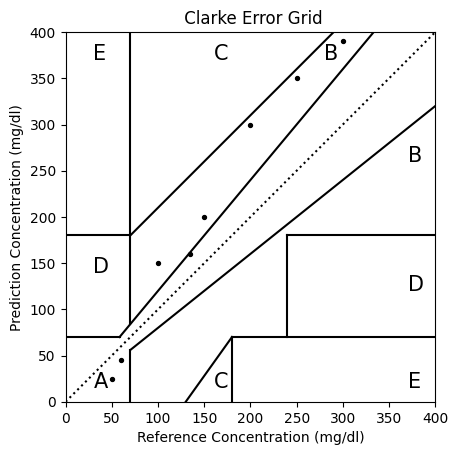

In [1]:
from src.helpers.diabetes.cega import clarke_error_grid

y_true = [50, 60, 100, 135, 150, 200, 250, 300]
y_pred1 = [25, 45, 150, 160, 200, 300, 350, 390]
y_pred2 = [75, 75, 50, 110, 100, 100, 150, 210]
clarke_error_grid(y_true, y_pred1, "")

In [2]:
from src.helpers.diabetes.madex import mean_adjusted_exponent_error

mean_adjusted_exponent_error([50], [40])

81.71026546852883

In [2]:
from src.bgc_providers.ohio_bgc_provider import OhioBgcProvider

test_provider = OhioBgcProvider()
test_dataframe = test_provider.tsfresh_dataframe()
test_dataframe

,date_time,mock_date,time_of_day,part_of_day,time,bg_value,id
0,2021-12-07 01:17:00,2021-12-07,01:17:00,late night,0.00,101,a
1,2021-12-07 01:22:00,2021-12-07,01:22:00,late night,0.08,98,a
2,2021-12-07 01:27:00,2021-12-07,01:27:00,late night,0.17,104,a
3,2021-12-07 01:32:00,2021-12-07,01:32:00,late night,0.25,112,a
4,2021-12-07 01:37:00,2021-12-07,01:37:00,late night,0.33,120,a
...,...,...,...,...,...,...,...
10791,2022-01-17 23:36:00,2022-01-17,23:36:00,night,1006.32,161,a
10792,2022-01-17 23:41:00,2022-01-17,23:41:00,night,1006.40,164,a
10793,2022-01-17 23:46:00,2022-01-17,23:46:00,night,1006.48,168,a
10794,2022-01-17 23:51:00,2022-01-17,23:51:00,night,1006.57,172,a


In [4]:
stream = test_provider.simulate_glucose_stream()
next(stream)
next(stream)
next(stream)
next(stream)

2023-08-21 09:02:52.886 | INFO     | src.bgc_providers.ohio_bgc_provider:simulate_glucose_stream:46 - {'ts': '07-12-2021 01:17:00', 'value': '101'}
2023-08-21 09:02:52.888 | INFO     | src.bgc_providers.ohio_bgc_provider:simulate_glucose_stream:46 - {'ts': '07-12-2021 01:22:00', 'value': '98'}
2023-08-21 09:02:52.890 | INFO     | src.bgc_providers.ohio_bgc_provider:simulate_glucose_stream:46 - {'ts': '07-12-2021 01:27:00', 'value': '104'}
2023-08-21 09:02:52.892 | INFO     | src.bgc_providers.ohio_bgc_provider:simulate_glucose_stream:46 - {'ts': '07-12-2021 01:32:00', 'value': '112'}


{'time': 1638840720.0, 'value': 112.0, 'patient': '559'}

In [11]:
from src.helpers.experiment import Experiment

exp = Experiment(559, 6, 6, enable_neptune=False)
exp.run_experiment()

2023-08-21 09:13:32.996 | INFO     | src.helpers.experiment:create_ds_name:33 - dataframes/559_train_0_6_6.pkl
2023-08-21 09:13:33.098 | INFO     | src.helpers.experiment:timeseries_dataframe:39 - {'ohio_no': 559, 'scope': 'train', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 6, 'minimal_features': False}
2023-08-21 09:13:33.471 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:49 - Found existing pickle file. Continuing...
2023-08-21 09:13:33.472 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_train_0_6_6.pkl


Original Dataframe
(10785, 797)
Dataframe after removing cols with NaNs
(10785, 290)
Dataframe after removing cols with infinites
(10785, 290)


2023-08-21 09:13:34.467 | WARNING  | src.helpers.experiment:remove_gaps:147 - [223, 1181, 1804, 1830, 1900, 2312, 2595, 2737, 3083, 3225, 3483, 3553, 3695, 4838, 5106, 5176, 6467, 6763, 7196, 7370, 7864, 8017, 8289, 8310, 8516, 8744, 8995, 9424, 9910, 10274]


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30313
[LightGBM] [Info] Number of data points in the train set: 7297, number of used features: 235
[LightGBM] [Info] Start training from score 166.762779


2023-08-21 09:13:46.925 | INFO     | src.helpers.experiment:log_regressor_param:219 - Pipeline(memory=FastMemory(location=C:\Users\pstavros\DOCUME~1\MobaXterm\slash\var\log\xwin\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['bg_value__variance_larger_than_standard_deviation',
                                             'bg_value__has_duplicate_max',
                                             'bg_value__has_duplicate_min',
                                             'bg_value__has_duplicate',
                                             'bg_value__sum_values',
                                             'bg_value__abs_energy',
                                             'bg_value_...
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['part_of_day'],
                                    transformer=OneHotEncoder(cols=[

                                    Model           MAE           MSE  \
lightgbm  Light Gradient Boosting Machine  1.696780e+01  5.723345e+02   
dt                Decision Tree Regressor  2.349960e+01  1.151072e+03   
llar         Lasso Least Angle Regression  1.793260e+01  6.576209e+02   
en                            Elastic Net  1.794480e+01  6.594742e+02   
lasso                    Lasso Regression  1.795970e+01  6.588742e+02   
br                         Bayesian Ridge  1.794600e+01  6.635748e+02   
omp           Orthogonal Matching Pursuit  1.918680e+01  7.192580e+02   
knn                 K Neighbors Regressor  2.361190e+01  1.163172e+03   
lr                      Linear Regression  1.773870e+01  6.588155e+02   
ridge                    Ridge Regression  1.777810e+01  6.600623e+02   
dummy                     Dummy Regressor  5.762430e+01  4.922529e+03   
huber                     Huber Regressor  1.823750e+01  7.585672e+02   
par          Passive Aggressive Regressor  3.936570

2023-08-21 09:14:53.704 | INFO     | src.helpers.experiment:log_best_models:242 - Model 1:
2023-08-21 09:14:53.705 | INFO     | src.helpers.experiment:log_best_models:243 - LGBMRegressor(n_jobs=-1, random_state=1974)


Transformation Pipeline and Model Successfully Saved


2023-08-21 09:14:54.091 | INFO     | src.helpers.experiment:log_best_models:242 - Model 2:
2023-08-21 09:14:54.092 | INFO     | src.helpers.experiment:log_best_models:243 - DecisionTreeRegressor(random_state=1974)


Transformation Pipeline and Model Successfully Saved


2023-08-21 09:14:54.474 | INFO     | src.helpers.experiment:log_best_models:242 - Model 3:
2023-08-21 09:14:54.474 | INFO     | src.helpers.experiment:log_best_models:243 - LassoLars(random_state=1974)


                             Model      MAE       MSE     RMSE      R2  \
0  Light Gradient Boosting Machine  16.2692  520.4189  22.8127  0.8941   

    RMSLE    MAPE       MADEX    RMADEX  
0  0.1522  0.1122  23901.9171  154.6024  
       bg_value__variance_larger_than_standard_deviation  \
1748                                                 1.0   
7550                                                 1.0   
2782                                                 1.0   
9869                                                 1.0   
10515                                                1.0   

       bg_value__has_duplicate_max  bg_value__has_duplicate_min  \
1748                           0.0                          1.0   
7550                           0.0                          0.0   
2782                           0.0                          0.0   
9869                           0.0                          0.0   
10515                          0.0                          0.0   

   

2023-08-21 09:14:55.155 | INFO     | src.helpers.experiment:run_experiment:318 - {'A': 2644, 'B': 403, 'C': 1, 'D': 80, 'E': 0}
2023-08-21 09:14:55.156 | INFO     | src.helpers.experiment:run_experiment:319 - 22.81269069234561
2023-08-21 09:14:55.157 | INFO     | src.helpers.experiment:run_experiment:320 - 154.60244840442815
2023-08-21 09:14:55.158 | INFO     | src.helpers.experiment:create_ds_name:33 - dataframes/559_test_0_6_6.pkl
2023-08-21 09:14:55.179 | INFO     | src.helpers.experiment:timeseries_dataframe:39 - {'ohio_no': 559, 'scope': 'test', 'train_ds_size': 0, 'window_size': 6, 'prediction_horizon': 6, 'minimal_features': False}
2023-08-21 09:14:55.245 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:49 - Found existing pickle file. Continuing...
2023-08-21 09:14:55.246 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_test_0_6_6.pkl


[2644, 403, 1, 80, 0]
Original Dataframe
(2503, 797)
Dataframe after removing cols with NaNs
(2503, 290)
Dataframe after removing cols with infinites
(2503, 290)


2023-08-21 09:14:55.537 | WARNING  | src.helpers.experiment:remove_gaps:147 - [483, 722, 1087, 1249, 1756, 2039, 2181, 2277]


                             Model      MAE       MSE     RMSE      R2  \
0  Light Gradient Boosting Machine  13.5838  379.3418  19.4767  0.9175   

    RMSLE    MAPE      MADEX   RMADEX  
0  0.1252  0.0877  5930.5978  77.0104  
   bg_value__variance_larger_than_standard_deviation  \
0                                                1.0   
1                                                1.0   
2                                                1.0   
3                                                1.0   
4                                                1.0   

   bg_value__has_duplicate_max  bg_value__has_duplicate_min  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          1.0                          0.0   

   bg_value__has_duplicate  bg_value__sum_values  bg_va

2023-08-21 09:14:56.677 | INFO     | src.helpers.experiment:run_experiment:324 - {'A': 2173, 'B': 209, 'C': 0, 'D': 25, 'E': 0}
2023-08-21 09:14:56.678 | INFO     | src.helpers.experiment:run_experiment:325 - 19.476699726367336
2023-08-21 09:14:56.679 | INFO     | src.helpers.experiment:run_experiment:326 - 77.01037443466316
2023-08-21 09:14:56.681 | INFO     | src.helpers.experiment:run_experiment:327 - Execution Time: 83.68537473678589


[2173, 209, 0, 25, 0]


In [ ]:
import urllib.request

external_ip = urllib.request.urlopen("https://ident.me").read().decode("utf-8")
external_ip

In [ ]:
from src.mongo import MongoDB

mongo = MongoDB()
mongo.ping()

In [ ]:
exp.train_df.to_excel('excel_dataframes/full_train_dataframe.xlsx')